**Dataset:** Network_Intrusion Dataset


# **1. Import Libraries/Dataset:**

In [ ]:
# Importing the libraries...

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import nltk
import time
from wordcloud import WordCloud

from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
%matplotlib inline


In [ ]:
# Creating Dataframe:

df = pd.read_csv("/content/drive/MyDrive/datasets/Network_Intrusion_DS.csv")

# **2. Data Visualization and Exploration:**

In [ ]:
# Shape of the Dataset:

df.shape

(22544, 40)

### **Top 10 Records:**

In [ ]:
df.head(10)

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ        0.0        0.0     0   
1         0           tcp   private   REJ        0.0        0.0     0   
2         2           tcp  ftp_data    SF    12983.0        0.0     0   
3         0          icmp     eco_i    SF       20.0        0.0     0   
4         1           tcp    telnet  RSTO        0.0       15.0     0   
5         0           tcp      http    SF      267.0    14515.0     0   
6         0           tcp      smtp    SF     1022.0      387.0     0   
7         0           tcp    telnet    SF      129.0      174.0     0   
8         0           tcp      http    SF      327.0      467.0     0   
9         0           tcp       ftp    SF       26.0      157.0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          0                0   
4               0       0    0                  0          0                0   
5               0       0    0                  0          1                0   
6               0       0    0                  0          1                0   
7               0       0    0                  1          0                0   
8               0       0    0                  0          1                0   
9               0       0    0                  1          0                0   

   root_shell  num_root  num_shells  num_access_files  num_outbound_cmds  \
0           0         0           0                 0                  0   
1           0         0           0                 0                  0   
2           0         0           0                 0                  0   
3           0         0           0                 0                  0   
4           0         0           0                 0                  0   
5           0         0           0                 0                  0   
6           0         0           0                 0                  0   
7           0         0           0                 0                  0   
8           0         0           0                 0                  0   
9           0         0           0                 0                  0   

   is_host_login  is_guest_login  count  srv_count  serror_rate  \
0              0               0  229.0       10.0          0.0   
1              0               0  136.0        1.0          0.0   
2              0               0    1.0        1.0          0.0   
3              0               0    1.0       65.0          0.0   
4              0               0    1.0        8.0          0.0   
5              0               0    4.0        4.0          0.0   
6              0               0    1.0        3.0          0.0   
7              0               0    1.0        1.0          0.0   
8              0               0   33.0       47.0          0.0   
9              0               1    1.0        1.0          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0             0.00          1.0              1.0           0.04   
1             0.00          1.0              1.0           0.01   
2             0.00          0.0              0.0           1.00   
3             0.00          0.0              0.0           1.00   
4             0.12          1.0              0.5           1.00   
5             0.00          0.0              0.0           1.00   
6             0.00          0.0              0.0           1.00   
7             0.00          0.0              0.0           1.00   
8             0.00          0.0              0.0           1.00   
9             0.00          0.0              0.0           1.0

### **Bottom 10 Records:**

In [ ]:
df.tail(10)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
22534         0           tcp   private  REJ        0.0        0.0     0   
22535         0           tcp      http   SF      280.0     6087.0     0   
22536         0           tcp  iso_tsap  REJ        0.0        0.0     0   
22537         1           tcp      smtp   SF     2599.0      293.0     0   
22538         0          icmp     ecr_i   SF     1032.0        0.0     0   
22539         0           tcp      smtp   SF      794.0      333.0     0   
22540         0           tcp      http   SF      317.0      938.0     0   
22541         0           tcp      http   SF    54540.0     8314.0     0   
22542         0           udp  domain_u   SF       42.0       42.0     0   
22543         0           tcp    sunrpc  REJ        0.0        0.0     0   

       wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
22534               0       0    0                  0          0   
22535               0       0    0                  0          1   
22536               0       0    0                  0          0   
22537               0       0    0                  0          1   
22538               0       0    0                  0          0   
22539               0       0    0                  0          1   
22540               0       0    0                  0          1   
22541               0       0    2                  0          1   
22542               0       0    0                  0          0   
22543               0       0    0                  0          0   

       num_compromised  root_shell  num_root  num_shells  num_access_files  \
22534                0           0         0           0                 0   
22535                0           0         0           0                 0   
22536                0           0         0           0                 0   
22537                0           0         0           0                 0   
22538                0           0         0           0                 0   
22539                0           0         0           0                 0   
22540                0           0         0           0                 0   
22541                1           0         0           0                 0   
22542                0           0         0           0                 0   
22543                0           0         0           0                 0   

       num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  \
22534                  0              0               0  235.0       10.0   
22535                  0              0               0    3.0        3.0   
22536                  0              0               0  127.0       18.0   
22537                  0              0               0    2.0        2.0   
22538                  0              0               0   53.0       53.0   
22539                  0              0               0    1.0        1.0   
22540                  0              0               0    2.0       11.0   
22541                  0              0               0    5.0       10.0   
22542                  0              0               0    4.0        6.0   
22543                  0              0               0    4.0       10.0   

       serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
22534          0.0              0.0          1.0              1.0   
22535          0.0              0.0          0.0              0.0   
22536          0.0              0.0          1.0              1.0   
22537          0.0              0.0          0.0              0.0   
22538          0.0              0.0          0.0              0.0   
22539          0.0              0.0          0.0              0.0   
22540          0.0              0.0          0.0              0.0   
22541          0.0              0.0          0.0              0.0   
22542          0.0              0.0          0.0              0.0   
22543          0.0      

### **Statistical Description of Dataset:**

In [ ]:
df.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  22544.000000  2.253800e+04  2.253800e+04  22544.000000    22544.000000   
mean     218.859076  1.039812e+04  2.055584e+03      0.000311        0.008428   
std     1407.176612  4.728493e+05  2.122190e+04      0.017619        0.142599   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  5.400000e+01  4.600000e+01      0.000000        0.000000   
75%        0.000000  2.870000e+02  6.010000e+02      0.000000        0.000000   
max    57715.000000  6.282565e+07  1.345927e+06      1.000000        3.000000   

             urgent           hot  num_failed_logins     logged_in  \
count  22544.000000  22544.000000       22544.000000  22544.000000   
mean       0.000710      0.105394           0.021647      0.442202   
std        0.036473      0.928428           0.150328      0.496659   
min        0.000000      0.000000           0.000000      0.000000   
25%        0.000000      0.000000           0.000000      0.000000   
50%        0.000000      0.000000           0.000000      0.000000   
75%        0.000000      0.000000           0.000000      1.000000   
max        3.000000    101.000000           4.000000      1.000000   

       num_compromised    root_shell      num_root    num_shells  \
count     22544.000000  22544.000000  22544.000000  22544.000000   
mean          0.119899      0.002440      0.114665      0.001153   
std           7.269597      0.049334      8.041614      0.048014   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           0.000000      0.000000      0.000000      0.000000   
max         796.000000      1.000000    878.000000      5.000000   

       num_access_files  num_outbound_cmds  is_host_login  is_guest_login  \
count      22544.000000            22544.0   22544.000000    22544.000000   
mean           0.003549                0.0       0.000488        0.028433   
std            0.067829                0.0       0.022084        0.166211   
min            0.000000                0.0       0.000000        0.000000   
25%            0.000000                0.0       0.000000        0.000000   
50%            0.000000                0.0       0.000000        0.000000   
75%            0.000000                0.0       0.000000        0.000000   
max            4.000000                0.0       1.000000        1.000000   

              count     srv_count   serror_rate  srv_serror_rate  \
count  22535.000000  22535.000000  22544.000000     22544.000000   
mean      79.011360     31.110095      0.102924         0.103635   
std      128.522332     89.021735      0.295367         0.298332   
min        0.000000      0.000000      0.000000         0.000000   
25%        1.000000      1.000000      0.000000         0.000000   
50%        8.000000      6.000000      0.000000         0.000000   
75%      123.000000     16.000000      0.000000         0.000000   
max      511.000000    511.000000      1.000000         1.000000   

        rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  \
count  22544.000000     22544.000000   22544.000000   22544.000000   
mean       0.238463         0.235179       0.740345       0.094074   
std        0.416118         0.416215       0.412496       0.259138   
min        0.000000         0.000000       0.000000       0.000000   
25%        0.000000         0.000000       0.250000       0.000000   
50%        0.000000         0.000000       1.000000       0.000000   
75%        0.250000         0.072500       1.000000       0.060000   
max        1.000000         1.000000       1.000000       1.000000   

       srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
count        22544.000000    22544

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22538 non-null  float64
 5   dst_bytes                    22538 non-null  float64
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
# column names in the dataset:

df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'num_root', 'num_shells', 'num_access_files', 'num_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

## **Checking if there are any duplicate records in the dataset:**


In [ ]:
# Checking if there are any duplicate records in the dataset:

duplicate_df = df[df.duplicated()]
print(duplicate_df.shape)

(3, 40)


In [ ]:
# Droppig duplicate records:

df = df.drop_duplicates()
print(df.shape)

(22541, 40)


### **Conclusion:** Dataset have only 3 duplicate records which are negligible so we dropped them.

## **Checking for missing (null) values in dataset:**

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      6
dst_bytes                      6
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
num_root                       0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          9
srv_count                      9
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

In [ ]:
df["src_bytes"] = df["src_bytes"].fillna(df["src_bytes"].median())
df["dst_bytes"] = df["dst_bytes"].fillna(df["dst_bytes"].median())
df["count"] = df["count"].fillna(df["count"].median())
df["srv_count"] = df["srv_count"].fillna(df["srv_count"].median())


### **Conclusion:** We have filled missing values with Median value because Median does not influenced by the skewed values.

In [ ]:
# Checking how many records have NULL values after replacing with Median values:

print(df.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
num_root                       0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

### **Target column "class" values Distribution:**

In [ ]:
# target column values distribution:

df['class'].value_counts()

anomaly    12830
normal      9711
Name: class, dtype: int64

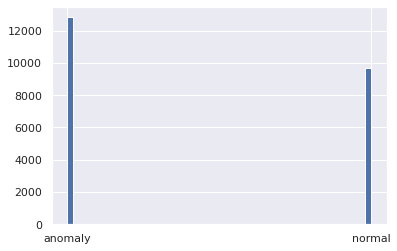

In [ ]:
df['class'].hist(bins=50)

### **Categorical features Distribution:**

In [ ]:
# Finding categorical features:

num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('class')

cate_cols

['service', 'flag', 'protocol_type']

In [ ]:
# Visualization of Categorical features:

def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")


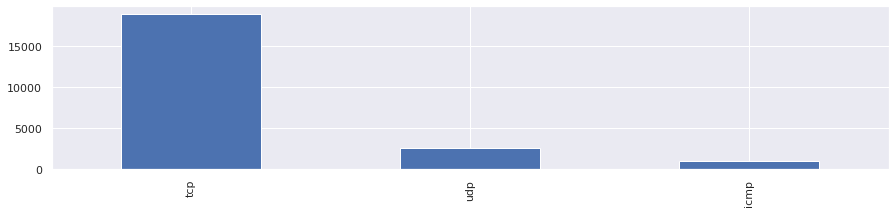

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('protocol_type')

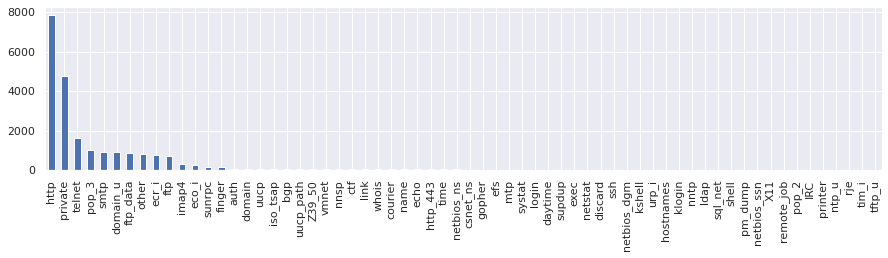

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

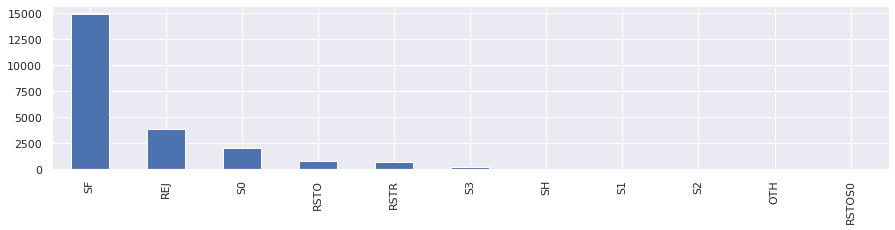

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('flag')

### **Numerical features Distribution:**

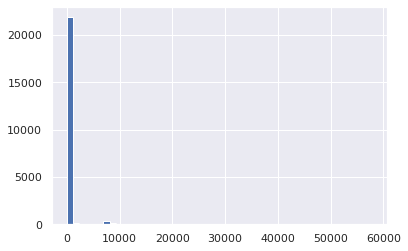

In [ ]:
df['duration'].hist(bins=50)

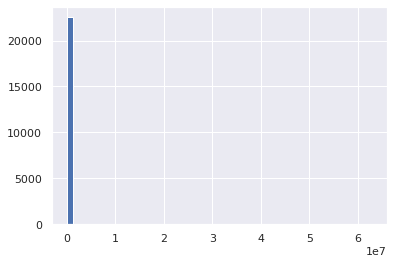

In [ ]:
df['src_bytes'].hist(bins=50)

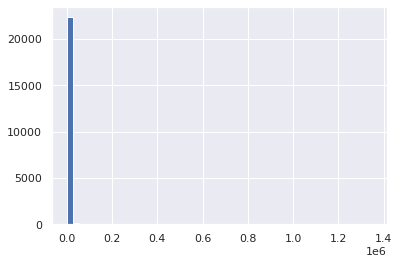

In [ ]:
df['dst_bytes'].hist(bins=50)

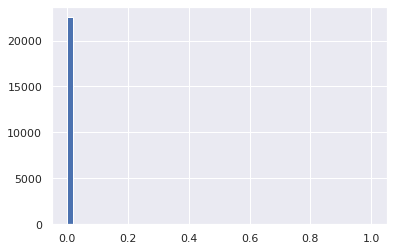

In [ ]:
df['land'].hist(bins=50)

In [ ]:
df['wrong_fragment'].value_counts()

0    22441
1       55
3       45
Name: wrong_fragment, dtype: int64

In [ ]:
df['urgent'].value_counts()

0    22531
1        5
2        4
3        1
Name: urgent, dtype: int64

In [ ]:
df['hot'].value_counts()

0      21534
2        846
1         90
4         20
3         12
5         11
7          9
6          6
18         3
22         2
10         2
30         2
11         1
19         1
101        1
15         1
Name: hot, dtype: int64

In [ ]:
df['num_failed_logins'].value_counts()

0    22063
1      473
3        3
2        1
4        1
Name: num_failed_logins, dtype: int64

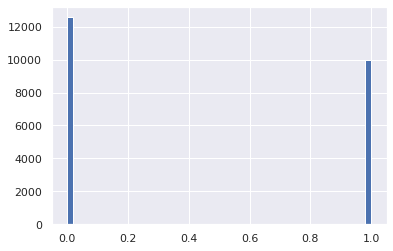

In [ ]:
df['logged_in'].hist(bins=50)

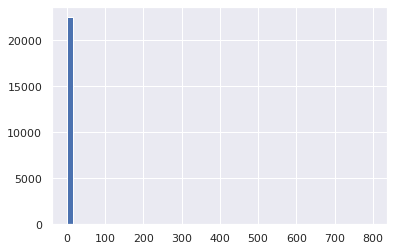

In [ ]:
df['num_compromised'].hist(bins=50)

In [ ]:
df['root_shell'].value_counts()

0    22486
1       55
Name: root_shell, dtype: int64

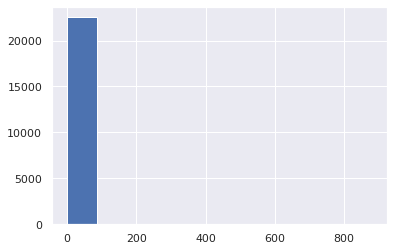

In [ ]:
df['num_root'].hist()

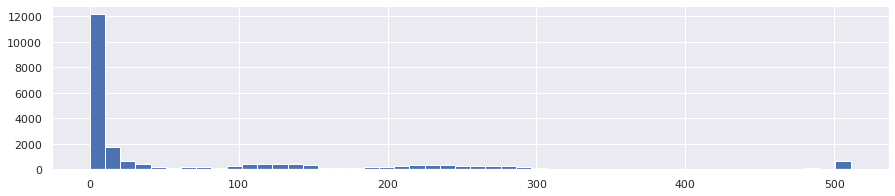

In [ ]:
plt.figure(figsize=(15,3))
df['count'].hist(bins=50)

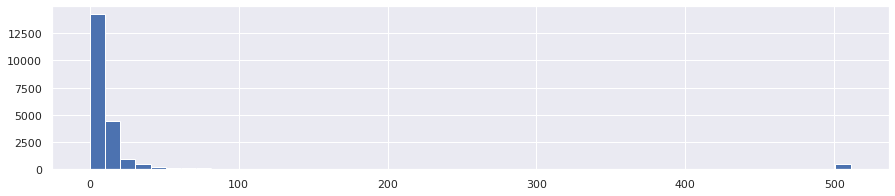

In [ ]:
plt.figure(figsize=(15,3))
df['srv_count'].hist(bins=50)

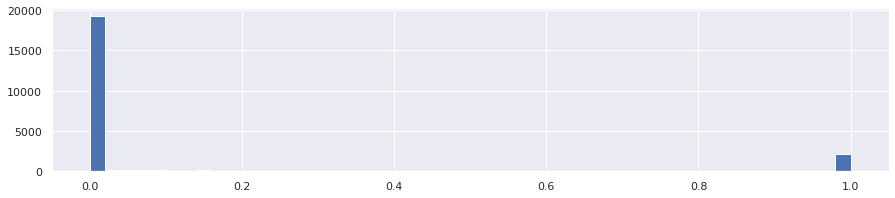

In [ ]:
plt.figure(figsize=(15,3))
df['serror_rate'].hist(bins=50)

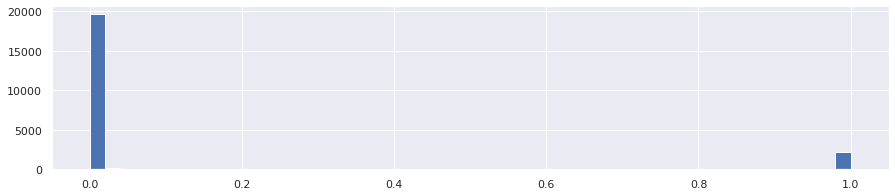

In [ ]:
plt.figure(figsize=(15,3))
df['srv_serror_rate'].hist(bins=50)

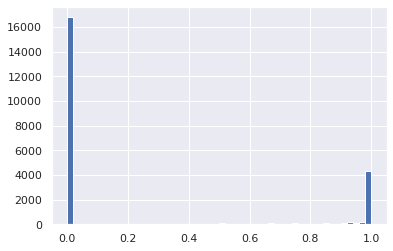

In [ ]:
df['rerror_rate'].hist(bins=50)

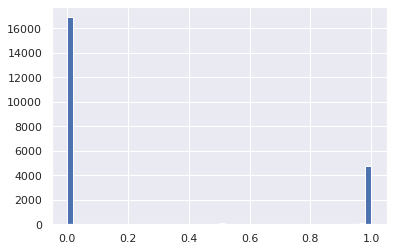

In [ ]:
df['srv_rerror_rate'].hist(bins=50)

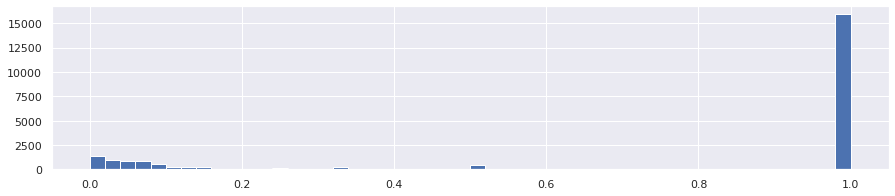

In [ ]:
plt.figure(figsize=(15,3))
df['same_srv_rate'].hist(bins=50)

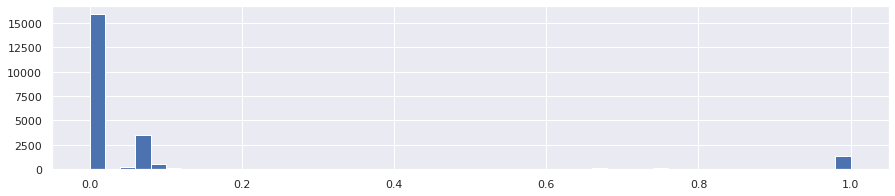

In [ ]:
plt.figure(figsize=(15,3))
df['diff_srv_rate'].hist(bins=50)

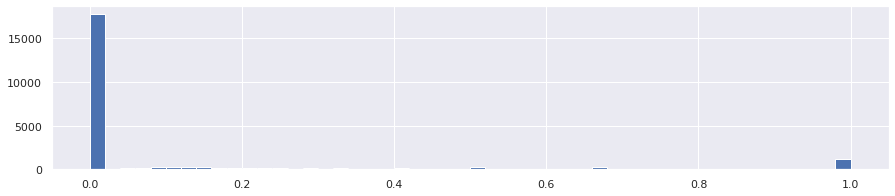

In [ ]:
plt.figure(figsize=(15,3))
df['srv_diff_host_rate'].hist(bins=50)

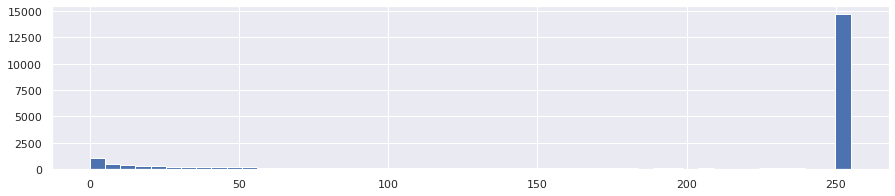

In [ ]:
plt.figure(figsize=(15,3))
df['dst_host_count'].hist(bins=50)

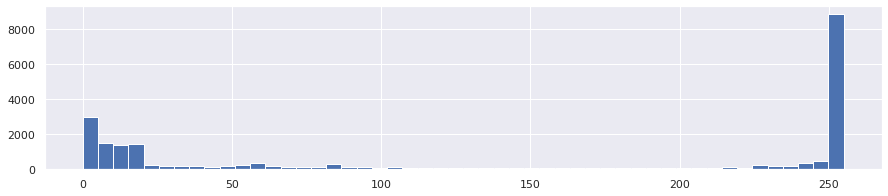

In [ ]:
plt.figure(figsize=(15,3))
df['dst_host_srv_count'].hist(bins=50)

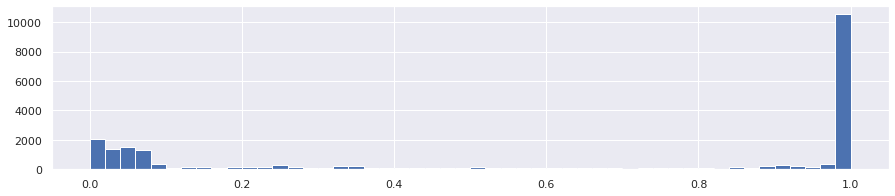

In [ ]:
plt.figure(figsize=(15,3))
df['dst_host_same_srv_rate'].hist(bins=50)

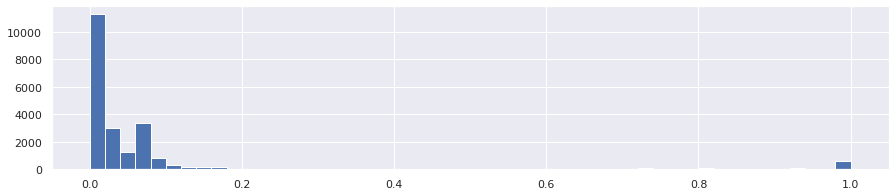

In [ ]:
plt.figure(figsize=(15,3))
df['dst_host_diff_srv_rate'].hist(bins=50)

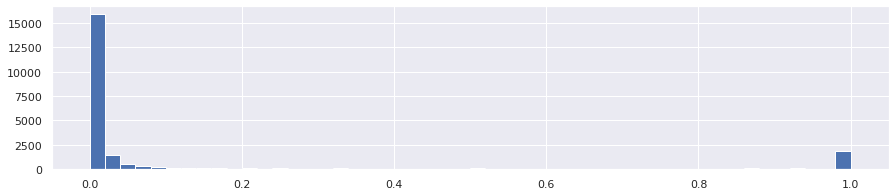

In [ ]:
plt.figure(figsize=(15,3))
df['dst_host_same_src_port_rate'].hist(bins=50)

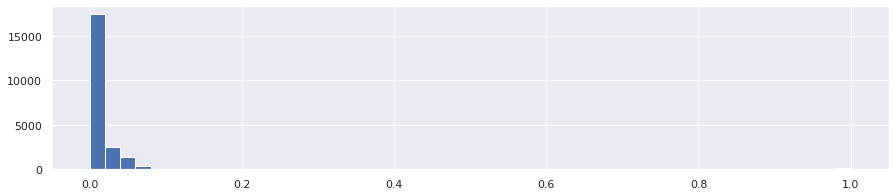

In [ ]:
plt.figure(figsize=(15,3))
df['dst_host_srv_diff_host_rate'].hist(bins=50)

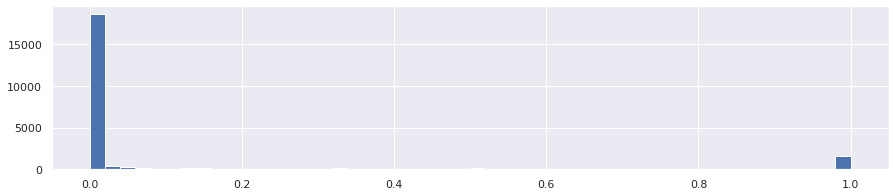

In [ ]:
plt.figure(figsize=(15,3))
df['dst_host_serror_rate'].hist(bins=50)

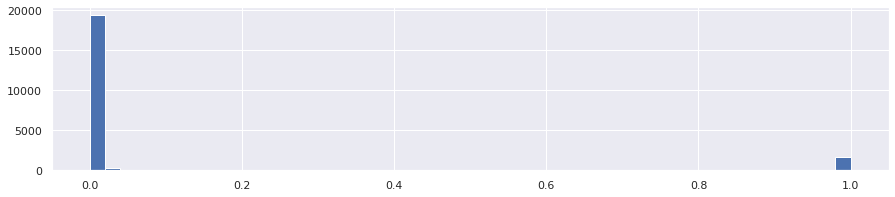

In [ ]:
plt.figure(figsize=(15,3))
df['dst_host_srv_serror_rate'].hist(bins=50)

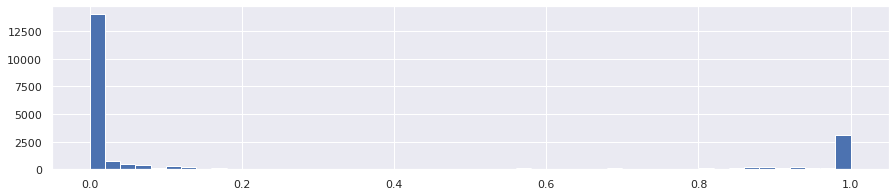

In [ ]:
plt.figure(figsize=(15,3))
df['dst_host_rerror_rate'].hist(bins=50)

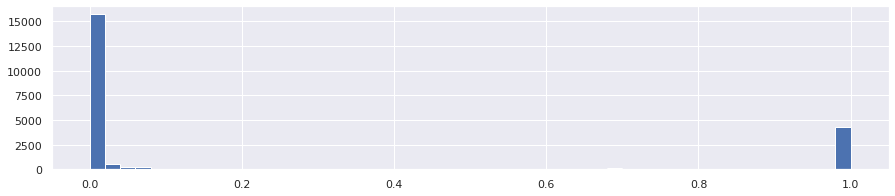

In [ ]:
plt.figure(figsize=(15,3))
df['dst_host_srv_rerror_rate'].hist(bins=50)

## **Top Flag Names:**

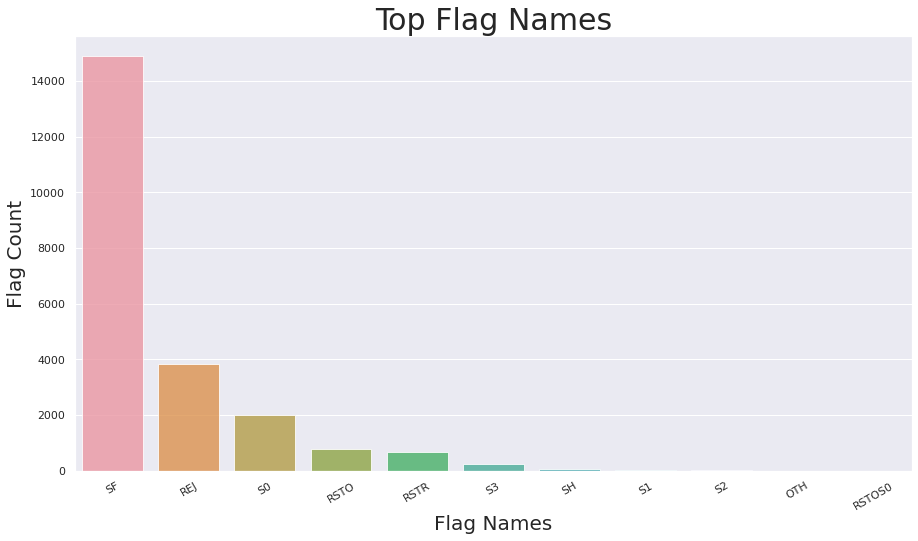

In [ ]:
flag_count  = df["flag"].value_counts()[:15,]
plt.figure(figsize=(15,8))
sns.barplot(flag_count.index, flag_count.values, alpha=0.8)
plt.title('Top Flag Names', fontsize=30)
plt.ylabel('Flag Count', fontsize=20)
plt.xlabel('Flag Names', fontsize=20)
plt.xticks(rotation=30)
plt.show()

## **Mostly Popular Sevice Names:**


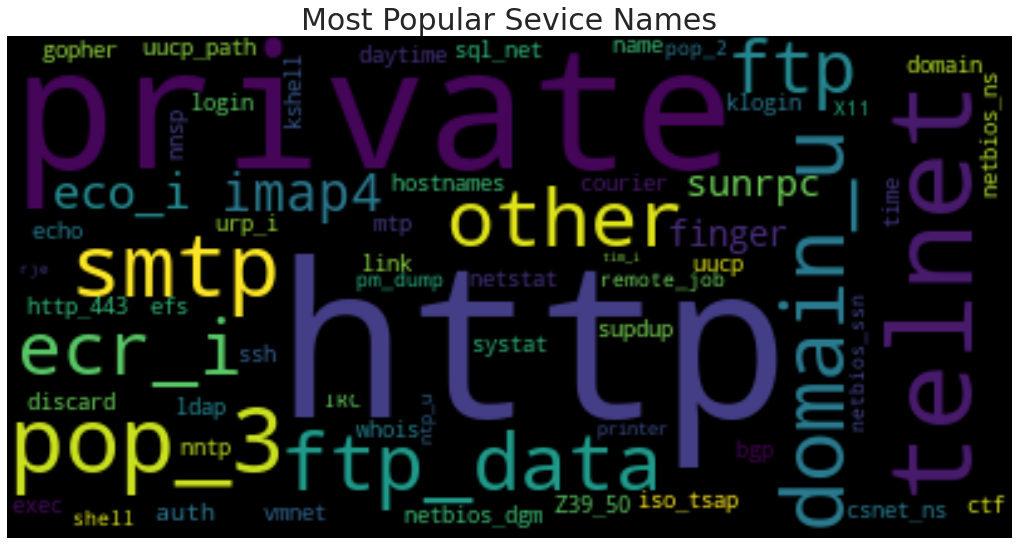

In [ ]:
Bigram_Freq = nltk.FreqDist(df['service'])
bigram_wordcloud = WordCloud(background_color = 'black', random_state = 21).generate_from_frequencies(Bigram_Freq)
plt.figure(figsize = (18,12))
plt.imshow(bigram_wordcloud,interpolation = 'bilinear')
plt.title('Most Popular Sevice Names', fontsize = 30)
plt.axis("off")
plt.show()

### **Converting 'class' column to Numerical column:**
* anomaly = 0
* normal = 1

In [ ]:
df['class'] = [0 if i=='anomaly' else 1 for i in df['class']]

### **Converting 'protocol_type' column to Numerical column:**
* tcp = 0
* udp = 1
* icmp = 2

In [ ]:
df['protocol_type'] = [0 if v == 'tcp' else 1 if v == 'udp' else 2 for v in df['protocol_type']]

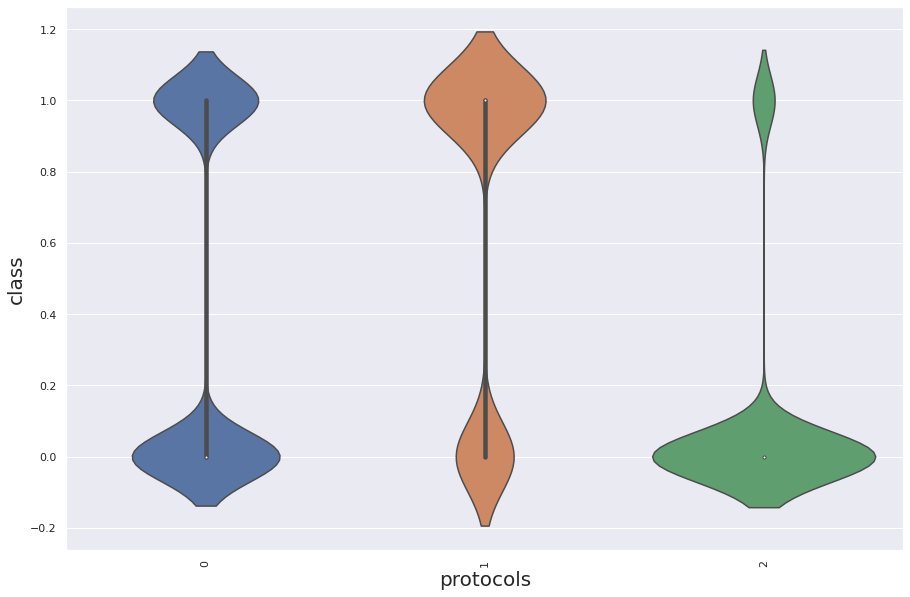

In [ ]:
plt.figure(figsize=(15,10))
data_exp = df.explode('class')
sns.violinplot(data=data_exp, x='protocol_type', y='class')
plt.ylabel('class', fontsize=20)
plt.xlabel('protocols', fontsize=20)
plt.xticks(rotation=90)
plt.show()

## **Drawing Box-plots to see Outliers in the Data:**

In [ ]:
# box plots:

fig = px.box(df.loc[0:,'duration':'hot'].melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

In [ ]:
# box plots:

fig = px.box(df.loc[0:,'num_failed_logins':'is_guest_login'].melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

In [ ]:
# box plots:

fig = px.box(df.loc[0:,'count':'dst_host_count'].melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

In [ ]:
# box plots:

fig = px.box(df.loc[0:,'dst_host_srv_count':'class'].melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

## **Describing Data:**

In [ ]:
df.describe()

duration  protocol_type     src_bytes     dst_bytes          land  \
count  22541.000000   22541.000000  2.254100e+04  2.254100e+04  22541.000000   
mean     218.888204       0.208819  1.039675e+04  2.055322e+03      0.000311   
std     1407.267989       0.507708  4.728179e+05  2.122050e+04      0.017620   
min        0.000000       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%        0.000000       0.000000  0.000000e+00  0.000000e+00      0.000000   
50%        0.000000       0.000000  5.400000e+01  4.600000e+01      0.000000   
75%        0.000000       0.000000  2.870000e+02  6.010000e+02      0.000000   
max    57715.000000       2.000000  6.282565e+07  1.345927e+06      1.000000   

       wrong_fragment        urgent           hot  num_failed_logins  \
count    22541.000000  22541.000000  22541.000000       22541.000000   
mean         0.008429      0.000710      0.105408           0.021649   
std          0.142608      0.036476      0.928489           0.150338   
min          0.000000      0.000000      0.000000           0.000000   
25%          0.000000      0.000000      0.000000           0.000000   
50%          0.000000      0.000000      0.000000           0.000000   
75%          0.000000      0.000000      0.000000           0.000000   
max          3.000000      3.000000    101.000000           4.000000   

          logged_in  num_compromised    root_shell      num_root  \
count  22541.000000     22541.000000  22541.000000  22541.000000   
mean       0.442261         0.119915      0.002440      0.114680   
std        0.496666         7.270081      0.049337      8.042149   
min        0.000000         0.000000      0.000000      0.000000   
25%        0.000000         0.000000      0.000000      0.000000   
50%        0.000000         0.000000      0.000000      0.000000   
75%        1.000000         0.000000      0.000000      0.000000   
max        1.000000       796.000000      1.000000    878.000000   

         num_shells  num_access_files  num_outbound_cmds  is_host_login  \
count  22541.000000      22541.000000            22541.0   22541.000000   
mean       0.001153          0.003549                0.0       0.000488   
std        0.048017          0.067834                0.0       0.022086   
min        0.000000          0.000000                0.0       0.000000   
25%        0.000000          0.000000                0.0       0.000000   
50%        0.000000          0.000000                0.0       0.000000   
75%        0.000000          0.000000                0.0       0.000000   
max        5.000000          4.000000                0.0       1.000000   

       is_guest_login         count     srv_count   serror_rate  \
count    22541.000000  22541.000000  22541.000000  22541.000000   
mean         0.028437     78.927954     31.104077      0.102931   
std          0.166222    128.424323     89.010622      0.295386   
min          0.000000      0.000000      0.000000      0.000000   
25%          0.000000      1.000000      1.000000      0.000000   
50%          0.000000      8.000000      6.000000      0.000000   
75%          0.000000    123.000000     16.000000      0.000000   
max          1.000000    511.000000    511.000000      1.000000   

       srv_serror_rate   rerror_rate  srv_rerror_rate  same_srv_rate  \
count     22541.000000  22541.000000     22541.000000   22541.000000   
mean          0.103649      0.238368         0.235077       0.740443   
std           0.298349      0.416064         0.416149       0.412435   
min           0.000000      0.000000         0.000000       0.000000   
25%           0.000000      0.000000         0.000000       0.250000   
50%           0.000000      0.000000         0.000000       1.000000   
75%           0.000000      0.250000         0.070000       1.000000   
max           1.000000      1.000000         1.000000       1.000000   

       diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
count   22541.00000

## **Observation for Outliers in the Dataset:**
* In most of the columns, Outliers are present.
* Only following columns has no outliers:
  * class,
  * dst_host_srv_count,
  * dst_host_same_srv_rate,
  * same_srv_rate,
  * dst_host_count,
  * logged_in



### **Adding new column 'class_color':**


In [ ]:
df['class_color'] = ['red' if i == 0 else "blue" for i in df['class']]

## **Mostly provided Services before Cleaning (Unbalanced Data):**

In [ ]:
service_data = df[['service', 'class_color']].value_counts()

In [ ]:
service_names = [i[0] for i in service_data.index]
class_colors = [i[1] for i in service_data.index]


In [ ]:
service_df = pd.DataFrame({"service_name": service_names, "service_count": service_data.values, "class_color": class_colors})
service_df

service_name  service_count class_color
0          http           6673        blue
1       private           3922         red
2        telnet           1582         red
3          http           1180         red
4         pop_3           1011         red
..          ...            ...         ...
79     domain_u              2         red
80         link              1        blue
81       tftp_u              1        blue
82        tim_i              1        blue
83   remote_job              1        blue

[84 rows x 3 columns]

In [ ]:
# plotly bar plot:

fig = px.bar(service_df, x='service_name', y='service_count', color='class_color', title='Mostly provided Services (Before Cleaning)')
fig.show()

### **Here:**
* **Red color = 'Anomaly' Class**
* **Blue color = 'Normal' Class**

## **Services with only Anomaly Class:**

In [ ]:
service_anomaly = df[df['class'] == 0]['service'].value_counts()

service_anomaly_df = pd.DataFrame({"service_name": service_anomaly.index, "service_count": service_anomaly.values})
service_anomaly_df

service_name  service_count
0       private           3922
1        telnet           1582
2          http           1180
3         pop_3           1011
4         other            770
..          ...            ...
57          rje              8
58        urp_i              5
59        tim_i              5
60          IRC              3
61     domain_u              2

[62 rows x 2 columns]

In [ ]:
fig = px.bar(service_anomaly_df, x="service_name", y="service_count", title="Services with Anomaly Class")
fig.show()

## **Services with only Normal Class:**

In [ ]:
service_normal = df[df['class'] == 1]['service'].value_counts()

service_normal_df = pd.DataFrame({"service_name": service_normal.index, "service_count": service_normal.values})
service_normal_df

service_name  service_count
0          http           6673
1      domain_u            892
2       private            852
3          smtp            618
4      ftp_data            320
5         other             65
6           ftp             48
7         ecr_i             48
8        finger             47
9        telnet             44
10        eco_i             26
11         auth             19
12        urp_i             18
13          IRC             10
14        ntp_u             10
15        pop_3              8
16         time              5
17          X11              4
18        tim_i              1
19       tftp_u              1
20         link              1
21   remote_job              1

In [ ]:
fig = px.bar(service_normal_df, x="service_name", y="service_count", title="Services with Normal Class")
fig.show()

# **3. Data Pre-processing and cleaning:**

## **Analysing Service Column:**

In [ ]:
# Anomaly class (0) services:
df[df['class'] == 0][['service', 'class']].value_counts()[:60]

service      class
private      0        3922
telnet       0        1582
http         0        1180
pop_3        0        1011
other        0         770
ecr_i        0         704
ftp          0         644
ftp_data     0         531
smtp         0         316
imap4        0         306
eco_i        0         236
sunrpc       0         159
finger       0          89
domain       0          51
uucp         0          50
iso_tsap     0          48
auth         0          48
uucp_path    0          46
bgp          0          46
Z39_50       0          45
vmnet        0          43
nnsp         0          42
ctf          0          41
link         0          40
courier      0          40
whois        0          40
echo         0          37
name         0          37
http_443     0          36
netbios_ns   0          36
gopher       0          34
csnet_ns     0          34
efs          0          33
systat       0          32
mtp          0          32
time         0          31
login    

In [ ]:
# Anomaly class (0) services:
df[df['class'] == 0][['service', 'class']].value_counts()[::-1]

service   class
domain_u  0           2
IRC       0           3
urp_i     0           5
tim_i     0           5
rje       0           8
                   ... 
other     0         770
pop_3     0        1011
http      0        1180
telnet    0        1582
private   0        3922
Length: 62, dtype: int64

In [ ]:
# Normal class (1) services:
df[df['class'] == 1][['service', 'class']].value_counts()[:60]

service     class
http        1        6673
domain_u    1         892
private     1         852
smtp        1         618
ftp_data    1         320
other       1          65
ecr_i       1          48
ftp         1          48
finger      1          47
telnet      1          44
eco_i       1          26
auth        1          19
urp_i       1          18
IRC         1          10
ntp_u       1          10
pop_3       1           8
time        1           5
X11         1           4
remote_job  1           1
link        1           1
tftp_u      1           1
tim_i       1           1
dtype: int64

## **Observation about 'service' column:**

* #### **Following services replaced with 'rare_one' services:**
  * **tftp_u, ntp_u, tftp_u**

* #### **Following services replaced with 'rare_zero' services:**
  * **link, tim_i, remote_job, rje, printer, pop_2, login, daytime, exec, supdup, netstat, ssh, discard, netbios_dgm, kshell, hostnames, klogin, nntp, ldap, sql_net, pm_dump, shell, netbios_ssn, courier, whois, name, echo, netbios_ns, http_443, csnet_ns, gopher, efs, mtp, systat, uucp_path, bgp, Z39_50, vmnet, nnsp, ctf, iso_tsap, uucp, sunrpc**

* #### **Following services replaced with 'rare_zero_one' services:**
  * **time, X11, IRC, urp_i, auth, finger**

* #### **In following services, rare 1 replaced with 0:**
  * **pop_3, eco_i, telnet, ftp, ecr_i, other**

* #### **In following services, rare 0 replaced with 1:**
  * **domain_u**


## **Cleaning (Balancing) 'Service' Column:**

In [ ]:
# replace rare 1 with zero in services:

df.loc[((df['service']=='link') & (df['class']==1)), 'class'] = 0
df.loc[((df['service']=='tim_i') & (df['class']==1)), 'class'] = 0
df.loc[((df['service']=='remote_job') & (df['class']==1)), 'class'] = 0
df.loc[((df['service']=='pop_3') & (df['class']==1)), 'class'] = 0
df.loc[((df['service']=='eco_i') & (df['class']==1)), 'class'] = 0
df.loc[((df['service']=='telnet') & (df['class']==1)), 'class'] = 0
df.loc[((df['service']=='ftp') & (df['class']==1)), 'class'] = 0
df.loc[((df['service']=='ecr_i') & (df['class']==1)), 'class'] = 0
df.loc[((df['service']=='other') & (df['class']==1)), 'class'] = 0

In [ ]:
# replace rare 0 with one in services:

df.loc[((df['service']=='domain_u') & (df['class']==0)), 'class'] = 1

In [ ]:
# 'rare_one' service:

df.loc[((df['service'] == 'tftp_u') | (df['service'] == 'ntp_u') | (df['service'] == 'tftp_u')), 'service'] = 'rare_one'

In [ ]:
# 'rare_zero' service:

df.loc[((df['service'] == 'tim_i') | (df['service'] == 'link') |
        (df['service'] == 'remote_job') | (df['service'] == 'rje') |
        (df['service'] == 'printer') | (df['service'] == 'pop_2') |
        (df['service'] == 'login') | (df['service'] == 'daytime') |
        (df['service'] == 'exec') | (df['service'] == 'supdup') |
        (df['service'] == 'netstat') | (df['service'] == 'ssh') |
        (df['service'] == 'discard') | (df['service'] == 'netbios_dgm') |
        (df['service'] == 'kshell') | (df['service'] == 'hostnames') |
        (df['service'] == 'klogin') | (df['service'] == 'nntp') |
        (df['service'] == 'ldap') | (df['service'] == 'sql_net') |
        (df['service'] == 'pm_dump') | (df['service'] == 'shell') |
        (df['service'] == 'netbios_ssn') | (df['service'] == 'courier') |
        (df['service'] == 'whois') | (df['service'] == 'name') |
        (df['service'] == 'echo') | (df['service'] == 'netbios_ns') |
        (df['service'] == 'http_443') | (df['service'] == 'csnet_ns') |
        (df['service'] == 'gopher') | (df['service'] == 'efs') |
        (df['service'] == 'mtp') | (df['service'] == 'systat') |
        (df['service'] == 'uucp_path') | (df['service'] == 'bgp') |
        (df['service'] == 'Z39_50') | (df['service'] == 'vmnet') |
        (df['service'] == 'nnsp') | (df['service'] == 'ctf') |
        (df['service'] == 'iso_tsap') | (df['service'] == 'uucp') |
        (df['service'] == 'domain') | (df['service'] == 'sunrpc')), 'service'] = 'rare_zero'

In [ ]:
# 'rare_zero_one' service:

df.loc[((df['service'] == 'time') | (df['service'] == 'X11') |
        (df['service'] == 'IRC') | (df['service'] == 'urp_i') |
        (df['service'] == 'auth') | (df['service'] == 'finger')), 'service'] = 'rare_zero_one'

## **Mostly provided Services after Cleaning (Balanced Data):**

In [ ]:
cleaned_service_data = df[['service', 'class_color']].value_counts()

services = [i[0] for i in cleaned_service_data.index]
colors = [i[1] for i in cleaned_service_data.index]


In [ ]:
balanced_service_df = pd.DataFrame({"service_name": services, "service_count": cleaned_service_data.values, "class_color": colors})
balanced_service_df


service_name  service_count class_color
0            http           6673        blue
1         private           3922         red
2          telnet           1582         red
3       rare_zero           1439         red
4            http           1180         red
5           pop_3           1011         red
6        domain_u            892        blue
7         private            852        blue
8           other            770         red
9           ecr_i            704         red
10            ftp            644         red
11           smtp            618        blue
12       ftp_data            531         red
13       ftp_data            320        blue
14           smtp            316         red
15          imap4            306         red
16          eco_i            236         red
17  rare_zero_one            187         red
18  rare_zero_one            103        blue
19          other             65        blue
20          ecr_i             48        blue
21            ftp             48        blue
22         telnet             44        blue
23          eco_i             26        blue
24       rare_one             11        blue
25          pop_3              8        blue
26      rare_zero              3        blue
27       domain_u              2         red

In [ ]:
# plotly bar plot:

fig = px.bar(balanced_service_df, x='service_name', y='service_count', color='class_color', title='Mostly provided Services (After Cleaning)')
fig.show()

## **Correlational Analysis:**

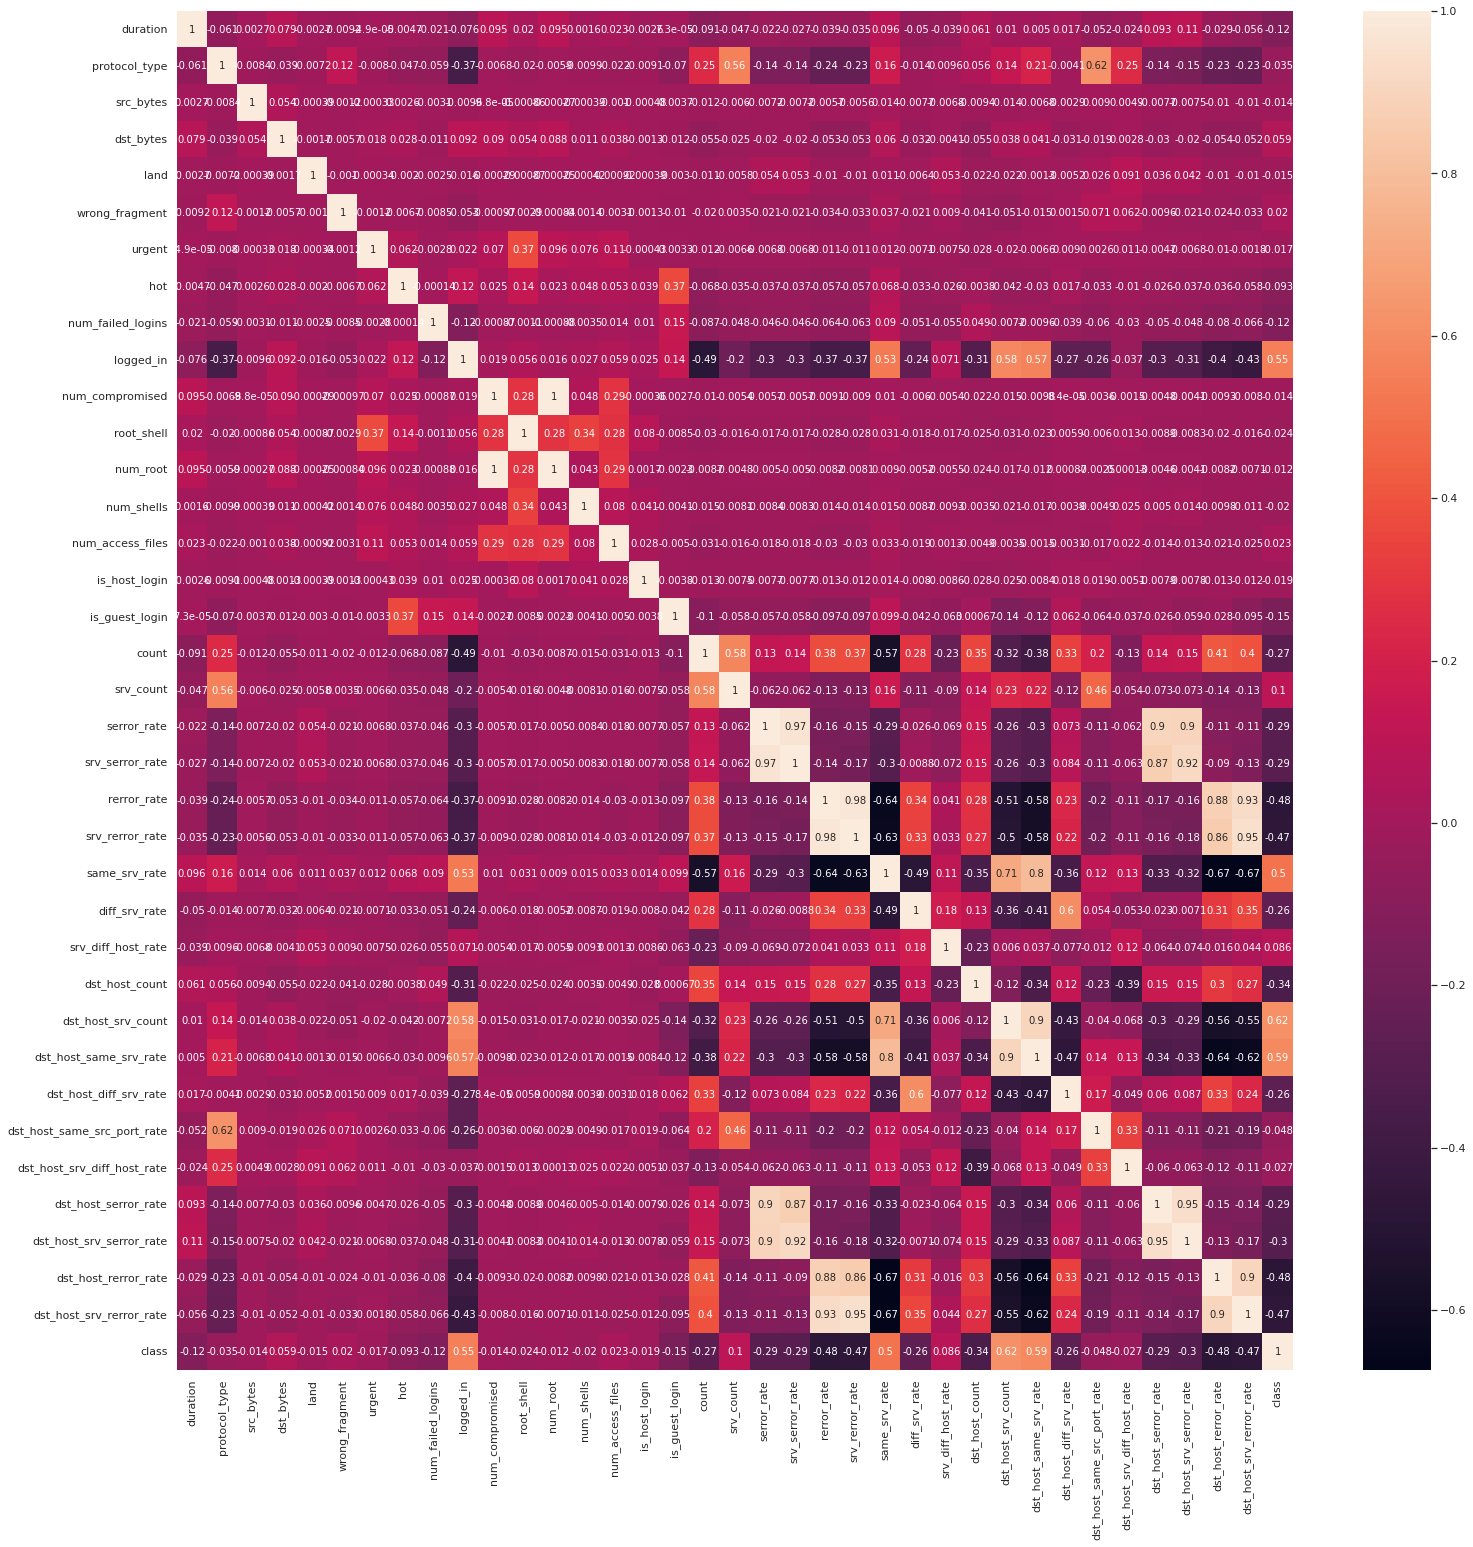

In [ ]:
# Seaborn’s heatmap:

df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values

plt.figure(figsize=(25, 25))
sns.heatmap(data=df.corr(), annot=True)

In [ ]:
df.corr().style.background_gradient(cmap="GnBu")

## **Observation about Correlation b/w Columns:**

### **Positively correlated Columns:**
* 'num_root' and 'num_compromised' are highly +ve correlated.
* 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate' and 'serror_rate' are highly +ve correlated.
* 'dst_host_serror_rate' and 'dst_host_srv_serror_rate' are +ve correlated with 'srv_serror_rate' column.
* 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'rerror_rate', and 'srv_rerror_rate' are highly +ve correlated.
* 'dst_host_srv_count' and 'dst_host_same_srv_rate' are +ve correlated.
* 'dst_host_serror_rate' and 'dst_host_srv_serror_rate' are +ve correlated.
* 'dst_host_rerror_rate' and 'dst_host_srv_rerror_rate' are +ve correlated.

### **Negatively correlated Columns:**
* 'srv_rerror_rate' and 'rerror_rate' are -ve correlated with 'same_srv_rate' column.
* 'dst_host_srv_rerror_rate' and 'dst_host_rerror_rate' are -ve correlated with 'same_srv_rate' column.
* 'dst_host_srv_rerror_rate' and 'dst_host_rerror_rate' are -ve correlated with 'dst_host_same_srv_rate' column.
* 'count' and 'same_srv_rate' are -ve correlated.
* 'dst_host_srv_rerror_rate' and 'dst_host_rerror_rate' are -ve correlated with 'dst_host_srv_count' column.
* 'dst_host_srv_count' and 'dst_host_same_srv_rate' are -ve correlated with 'srv_rerror_rate' column.
* 'dst_host_srv_count' and 'dst_host_same_srv_rate' are -ve correlated with 'rerror_rate' column.


## **Removing Highly correlated Columns to reduce Features:**

### **Creating the Correlation matrix and Selecting the Upper trigular matrix:**

In [ ]:
cor_matrix = df.corr().abs()

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


### **Droping the column with high correlation:**

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
df = df.drop(to_drop, axis = 1)
print(df.shape)

(22541, 33)


### **New DataFrame after reducing Features:**

In [ ]:
df.head()

duration  protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0              0   private   REJ        0.0        0.0     0   
1         0              0   private   REJ        0.0        0.0     0   
2         2              0  ftp_data    SF    12983.0        0.0     0   
3         0              2     eco_i    SF       20.0        0.0     0   
4         1              0    telnet  RSTO        0.0       15.0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          0                0   
4               0       0    0                  0          0                0   

   root_shell  num_shells  num_access_files  is_host_login  is_guest_login  \
0           0           0                 0              0               0   
1           0           0                 0              0               0   
2           0           0                 0              0               0   
3           0           0                 0              0               0   
4           0           0                 0              0               0   

   count  srv_count  serror_rate  rerror_rate  same_srv_rate  diff_srv_rate  \
0  229.0       10.0          0.0          1.0           0.04           0.06   
1  136.0        1.0          0.0          1.0           0.01           0.06   
2    1.0        1.0          0.0          0.0           1.00           0.00   
3    1.0       65.0          0.0          0.0           1.00           0.00   
4    1.0        8.0          0.0          1.0           1.00           0.00   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                0.00             255                  10   
1                0.00             255                   1   
2                0.00             134                  86   
3                1.00               3                  57   
4                0.75              29                  86   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   

   dst_host_srv_diff_host_rate  dst_host_rerror_rate  class class_color  
0                         0.00                  1.00      0         red  
1                         0.00                  1.00      0         red  
2                         0.02                  0.00      1        blue  
3                         0.28                  0.00      0         red  
4                         0.02                  0.83      0         red

In [ ]:
df.shape

(22541, 33)

# **4. Data Preparation:**

## **Converting Categorical Data to Numerical Data:**

In [ ]:
encoder=OneHotEncoder(sparse=False)

train_X_encoded = pd.DataFrame(encoder.fit_transform(df[["flag"]]))

train_X_encoded.columns = encoder.get_feature_names(['flag'])

df = df.drop(["flag"],axis=1)

df= pd.concat([df, train_X_encoded ], axis=1)

In [ ]:
encoder=OneHotEncoder(sparse=False)

train_X_encoded = pd.DataFrame(encoder.fit_transform(df[["service"]]))

train_X_encoded.columns = encoder.get_feature_names(['service'])

df = df.drop(["service"],axis=1)

df= pd.concat([df, train_X_encoded ], axis=1)

In [ ]:
df.shape

(22544, 58)

### **Dropping 'class_color' column:**

In [ ]:
df = df.drop(['class_color'], axis=1)

In [ ]:
df.isnull().sum()

duration                       3
protocol_type                  3
src_bytes                      3
dst_bytes                      3
land                           3
wrong_fragment                 3
urgent                         3
hot                            3
num_failed_logins              3
logged_in                      3
num_compromised                3
root_shell                     3
num_shells                     3
num_access_files               3
is_host_login                  3
is_guest_login                 3
count                          3
srv_count                      3
serror_rate                    3
rerror_rate                    3
same_srv_rate                  3
diff_srv_rate                  3
srv_diff_host_rate             3
dst_host_count                 3
dst_host_srv_count             3
dst_host_diff_srv_rate         3
dst_host_same_src_port_rate    3
dst_host_srv_diff_host_rate    3
dst_host_rerror_rate           3
class                          3
flag_OTH  

In [ ]:
# Dropping rows with 'NaN' or 'null' values:

df = df.dropna(axis=0)
print(df.shape)

(22538, 57)


### **Split the dataset into training and test data:**

In [ ]:
y = df["class"]
X = df.drop(["class"], axis=1)

print(df.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(22538, 57)
(15100, 56) (7438, 56)
(15100,) (7438,)


# **5. Model Building:**

## **1) RANDOM FOREST Model (Before Feature Selection):**

In [ ]:
# Creating RandomForestClassifier model:

model_RF = RandomForestClassifier(n_estimators=30)

In [ ]:
# Fitting Model:

start_time = time.time()
model_RF.fit(X_train, y_train.values.ravel())
end_time = time.time()


In [ ]:
# Training time taken:

print("Training time: ",end_time-start_time)

Training time:  0.40095067024230957


In [ ]:
# Predicting on Test Data:

start_time = time.time()
Y_test_pred_RF = model_RF.predict(X_test)
end_time = time.time()

In [ ]:
# Testing time taken:

print("Testing time: ",end_time-start_time)

Testing time:  0.04817676544189453


In [ ]:
print("Train score is:", model_RF.score(X_train, y_train))
print("Test score is:",model_RF.score(X_test,y_test))

Train score is: 0.9990066225165563
Test score is: 0.986824415165367


In [ ]:
# loss:

log_loss_RF = log_loss(y_test, Y_test_pred_RF)
print("loss:   %0.3f" % log_loss_RF)

loss:   0.455


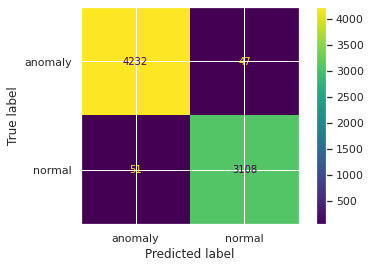

In [ ]:
# confusion_matrix:

labels = ['anomaly', 'normal']

cm = confusion_matrix(np.array(y_test), Y_test_pred_RF)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [ ]:
# classification_report:

print("classification_report:", classification_report(y_test,Y_test_pred_RF))

classification_report:               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4279
         1.0       0.99      0.98      0.98      3159

    accuracy                           0.99      7438
   macro avg       0.99      0.99      0.99      7438
weighted avg       0.99      0.99      0.99      7438



## **2) Artificial Neural Network Model (Before Feature Selection):**

In [ ]:
def fun():
    model = Sequential()

    # here 30 is the output dimension
    model.add(Dense(56,input_dim =56,activation = 'relu',kernel_initializer='random_uniform'))

    # In next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))

    # 5 classes: normal,anomaly
    model.add(Dense(2,activation='softmax'))

    # loss is categorical_crossentropy which specifies that we have multiple classes

    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

    return model

In [ ]:
"""
Since the dataset is very big and we cannot fit complete data at once so we are using batch size.
This divides our data into batches each of size equal to batch_size.
Now only this number of samples will be loaded into memory and processed.
Once we are done with one batch it is flushed from memory and the next batch will be processed.
"""

# Creating Artificial Neural Network Model:

model_ANN = KerasClassifier(build_fn=fun,epochs=25,batch_size=56)

In [ ]:
# Fitting Model:

start = time.time()
model_ANN.fit(X_train, y_train.values.ravel())
end = time.time()

Epoch 1/25
270/270 [==============================] - 1s 3ms/step - loss: 0.5684 - accuracy: 0.8242
Epoch 2/25
270/270 [==============================] - 1s 2ms/step - loss: 0.4673 - accuracy: 0.8920
Epoch 3/25
270/270 [==============================] - 1s 2ms/step - loss: 0.3933 - accuracy: 0.9144
Epoch 4/25
270/270 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.9272
Epoch 5/25
270/270 [==============================] - 1s 2ms/step - loss: 0.3053 - accuracy: 0.9302
Epoch 6/25
270/270 [==============================] - 1s 3ms/step - loss: 0.2684 - accuracy: 0.9392
Epoch 7/25
270/270 [==============================] - 1s 2ms/step - loss: 0.2422 - accuracy: 0.9452
Epoch 8/25
270/270 [==============================] - 1s 2ms/step - loss: 0.2246 - accuracy: 0.9466
Epoch 9/25
270/270 [==============================] - 1s 3ms/step - loss: 0.2356 - accuracy: 0.9378
Epoch 10/25
270/270 [==============================] - 1s 2ms/step - loss: 0.2905 - accuracy: 0.9087

In [ ]:
# Training time taken:

print('Training time')
print((end-start))

Training time
16.023168087005615


In [ ]:
# Predicting on Test data:

start_time = time.time()
Y_test_pred_ANN = model_ANN.predict(X_test)
end_time = time.time()

In [ ]:
# Testing time taken:

print("Testing time: ",end_time-start_time)


Testing time:  0.4055500030517578


In [ ]:
# Predicting on Training data:

start_time = time.time()
Y_train_pred_ANN = model_ANN.predict(X_train)
end_time = time.time()

In [ ]:
print("Training Score: ", accuracy_score(y_train,Y_train_pred_ANN))
print("Testing Score: ", accuracy_score(y_test,Y_test_pred_ANN))


Training Score:  0.9537086092715232
Testing Score:  0.9520032266738371


In [ ]:
# loss:

log_loss_ANN = log_loss(y_test, Y_test_pred_ANN)
print("loss:   %0.3f" % log_loss_ANN)

loss:   1.658


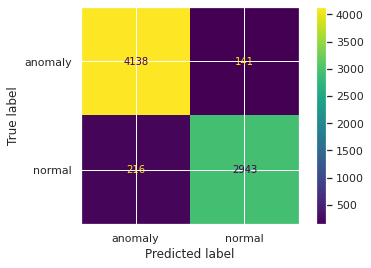

In [ ]:
# confusion_matrix:

labels = ['anomaly', 'normal']
cm = confusion_matrix(np.array(y_test), Y_test_pred_ANN)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [ ]:
# classification_report:

print("classification_report:", classification_report(y_test,Y_test_pred_ANN))

classification_report:               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      4279
         1.0       0.95      0.93      0.94      3159

    accuracy                           0.95      7438
   macro avg       0.95      0.95      0.95      7438
weighted avg       0.95      0.95      0.95      7438



## **Feature Selection (using Random Forest):**

In [ ]:
model_RF.feature_importances_

array([3.91133416e-02, 2.65461829e-02, 1.24689119e-01, 1.41683886e-01,
       4.82411208e-05, 7.74591091e-04, 1.33390745e-06, 1.60446687e-02,
       5.82718222e-03, 3.97750856e-02, 6.68843413e-03, 5.28726662e-04,
       2.56901980e-05, 1.85408844e-04, 0.00000000e+00, 1.39532804e-03,
       3.68583155e-02, 3.33858846e-02, 1.23006588e-02, 1.58286632e-02,
       3.06298559e-02, 3.24197130e-02, 9.18845946e-03, 1.42520881e-02,
       3.24140395e-02, 9.15019839e-02, 3.94059226e-02, 2.19669508e-02,
       7.29217420e-02, 0.00000000e+00, 6.83043360e-04, 3.97522030e-04,
       0.00000000e+00, 8.34618601e-04, 7.30512864e-04, 6.67524715e-05,
       1.18021585e-04, 2.17606481e-04, 2.00720266e-03, 4.73252088e-05,
       2.50776052e-02, 6.58480309e-04, 5.14040063e-03, 3.40122845e-03,
       6.60151596e-03, 6.36925505e-02, 2.61088167e-04, 2.10171907e-03,
       6.48503548e-03, 9.26338211e-03, 4.36877405e-04, 3.02512620e-04,
       4.53238222e-03, 1.30286999e-02, 7.51242007e-03, 0.00000000e+00])

In [ ]:
feature_importances = pd.DataFrame(model_RF.feature_importances_, index =X_train.columns,  columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances

importance
dst_bytes                      0.141684
src_bytes                      0.124689
dst_host_diff_srv_rate         0.091502
dst_host_rerror_rate           0.072922
service_http                   0.063693
logged_in                      0.039775
dst_host_same_src_port_rate    0.039406
duration                       0.039113
count                          0.036858
srv_count                      0.033386
diff_srv_rate                  0.032420
dst_host_srv_count             0.032414
same_srv_rate                  0.030630
protocol_type                  0.026546
service_domain_u               0.025078
dst_host_srv_diff_host_rate    0.021967
hot                            0.016045
rerror_rate                    0.015829
dst_host_count                 0.014252
service_smtp                   0.013029
serror_rate                    0.012301
service_private                0.009263
srv_diff_host_rate             0.009188
service_telnet                 0.007512
num_compromised                0.006688
service_ftp_data               0.006602
service_pop_3                  0.006485
num_failed_logins              0.005827
service_ecr_i                  0.005140
service_rare_zero_one          0.004532
service_ftp                    0.003401
service_other                  0.002102
flag_SF                        0.002007
is_guest_login                 0.001395
flag_RSTR                      0.000835
wrong_fragment                 0.000775
flag_S0                        0.000731
flag_REJ                       0.000683
service_eco_i                  0.000658
root_shell                     0.000529
service_rare_one               0.000437
flag_RSTO                      0.000398
service_rare_zero              0.000303
service_imap4                  0.000261
flag_S3                        0.000218
num_access_files               0.000185
flag_S2                        0.000118
flag_S1                        0.000067
land                           0.000048
flag_SH                        0.000047
num_shells                     0.000026
urgent                         0.000001
flag_RSTOS0                    0.000000
flag_OTH                       0.000000
is_host_login                  0.000000
service_nan                    0.000000

### **Important Features:**

Text(0.5, 0, 'Random Forest Feature Importance')

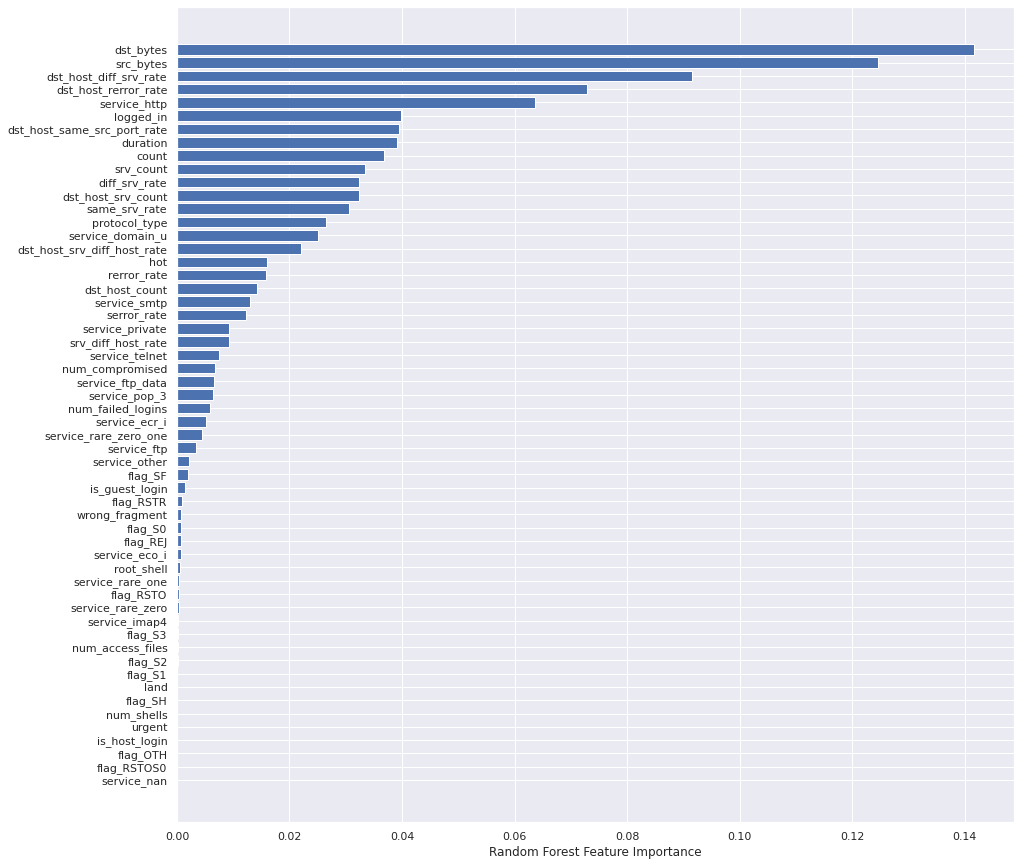

In [ ]:
plt.figure(figsize=(15,15))
sorted_idx = model_RF.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], model_RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
# Top 15 Important Features:
top_15_features = X_train.columns[sorted_idx][::-1][:15]

top_15_features = top_15_features.to_list()

In [ ]:
top_15_features

['dst_bytes',
 'src_bytes',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'service_http',
 'logged_in',
 'dst_host_same_src_port_rate',
 'duration',
 'count',
 'srv_count',
 'diff_srv_rate',
 'dst_host_srv_count',
 'same_srv_rate',
 'protocol_type',
 'service_domain_u']

## **New 'X' and new 'y' :**

In [ ]:
# Selecting Top 15 Important Features:

X_new = df[top_15_features]

y_new = df['class']

## **Model Building after Feature Selection:**

### **Split the dataset into training and test data:**

In [ ]:
# Splitting data into training and testing data:

X_train, X_test, y_train, y_test_2 = train_test_split(X_new, y_new, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((18030, 15), (4508, 15))

## **1) RANDOM FOREST Model (After Feature Selection):**

In [ ]:
# Creating RandomForestClassifier Model:

model_RF = RandomForestClassifier(n_estimators=30)

In [ ]:
# Fitting the model:

start_time = time.time()
model_RF.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [ ]:
# Training time taken:

print("Training time: ",end_time-start_time)


Training time:  0.36338233947753906


In [ ]:
# Predicting on Test Data:

start_time = time.time()
Y_test_pred_RF = model_RF.predict(X_test)
end_time = time.time()

In [ ]:
# Testing time taken:

print("Testing time: ",end_time-start_time)


Testing time:  0.031026601791381836


In [ ]:
print("Train score is:", model_RF.score(X_train, y_train))
print("Test score is:",model_RF.score(X_test,y_test_2))


Train score is: 0.9981697171381032
Test score is: 0.9838065661047027


In [ ]:
# loss:

log_loss_RF = log_loss(y_test_2, Y_test_pred_RF)
print("loss:   %0.3f" % log_loss_RF)

loss:   0.559


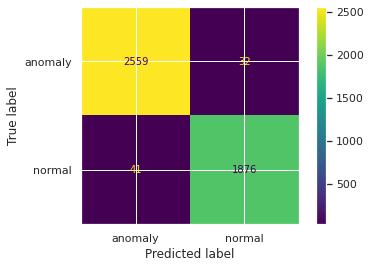

In [ ]:
# confusion_matrix:

labels = ['anomaly', 'normal']
cm = confusion_matrix(np.array(y_test_2), Y_test_pred_RF)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [ ]:
# classification_report:

print("classification_report:", classification_report(y_test_2,Y_test_pred_RF))

classification_report:               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2591
         1.0       0.98      0.98      0.98      1917

    accuracy                           0.98      4508
   macro avg       0.98      0.98      0.98      4508
weighted avg       0.98      0.98      0.98      4508



## **2) Artificial Neural Network Model (After Feature Selection):**

In [ ]:
def fun():
    model = Sequential()

    # here 30 is the output dimension
    model.add(Dense(15,input_dim =15,activation = 'relu',kernel_initializer='random_uniform'))

    # In next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))

    # 5 classes: normal,anomaly
    model.add(Dense(2,activation='softmax'))

    # loss is categorical_crossentropy which specifies that we have multiple classes

    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

    return model

In [ ]:
# Creating Artificial Neural Network Model:

model_ANN = KerasClassifier(build_fn=fun,epochs=25,batch_size=56)

In [ ]:
# Fitting the model:

start = time.time()
model_ANN.fit(X_train, y_train.values.ravel())
end = time.time()


Epoch 1/25
322/322 [==============================] - 1s 2ms/step - loss: 0.5591 - accuracy: 0.8235
Epoch 2/25
322/322 [==============================] - 1s 2ms/step - loss: 0.4536 - accuracy: 0.9094
Epoch 3/25
322/322 [==============================] - 1s 2ms/step - loss: 0.3866 - accuracy: 0.9167
Epoch 4/25
322/322 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.9291
Epoch 5/25
322/322 [==============================] - 1s 2ms/step - loss: 0.3107 - accuracy: 0.9233
Epoch 6/25
322/322 [==============================] - 1s 2ms/step - loss: 0.2745 - accuracy: 0.9341
Epoch 7/25
322/322 [==============================] - 1s 2ms/step - loss: 0.2562 - accuracy: 0.9366
Epoch 8/25
322/322 [==============================] - 1s 2ms/step - loss: 0.2412 - accuracy: 0.9417
Epoch 9/25
322/322 [==============================] - 1s 2ms/step - loss: 0.2234 - accuracy: 0.9426
Epoch 10/25
322/322 [==============================] - 1s 2ms/step - loss: 0.2010 - accuracy: 0.9492

In [ ]:
# Training time taken:

print('Training time')
print((end-start))


Training time
21.05411982536316


In [ ]:
# Predicting on Test Data:

start_time = time.time()
Y_test_pred_ANN_2 = model_ANN.predict(X_test)
end_time = time.time()


In [ ]:
# Testing time taken:

print("Testing time: ",end_time-start_time)


Testing time:  0.3573038578033447


In [ ]:
# Predicting on Training Data:

start_time = time.time()
Y_train_pred_ANN = model_ANN.predict(X_train)
end_time = time.time()


In [ ]:
print("Training Score: ", accuracy_score(y_train,Y_train_pred_ANN))
print("Testing Score: ", accuracy_score(y_test_2,Y_test_pred_ANN_2))


Training Score:  0.9572379367720466
Testing Score:  0.9536379769299024


In [ ]:
# loss:

log_loss_ANN = log_loss(y_test_2, Y_test_pred_ANN_2)
print("loss:   %0.3f" % log_loss_ANN)


loss:   1.601


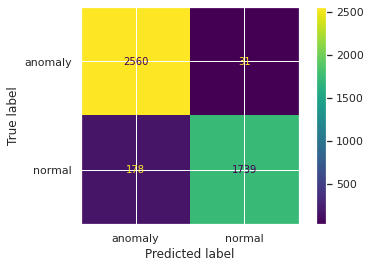

In [ ]:
# confusion_matrix:

labels = ['anomaly', 'normal']
cm = confusion_matrix(np.array(y_test_2), Y_test_pred_ANN_2)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()


In [ ]:
# classification_report:

print("classification_report:", classification_report(y_test_2,Y_test_pred_ANN_2))

classification_report:               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      2591
         1.0       0.98      0.91      0.94      1917

    accuracy                           0.95      4508
   macro avg       0.96      0.95      0.95      4508
weighted avg       0.96      0.95      0.95      4508



# **6. Performance Evaluation:**

#### **TRAINING ACCURACY of Models (Before Feature Selection):**

<BarContainer object of 2 artists>

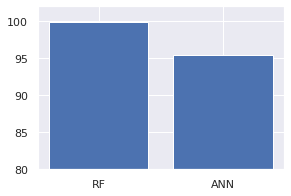

In [ ]:
names = ['RF' ,'ANN']
values = [99.900, 95.370]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

#### **TESTING ACCURACY of Models (Before Feature Selection):**

<BarContainer object of 2 artists>

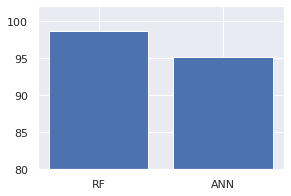

In [ ]:
names = ['RF', 'ANN']
values = [98.682, 95.200]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

#### **TRAINING ACCURACY of Models (After Feature Selection):**

<BarContainer object of 2 artists>

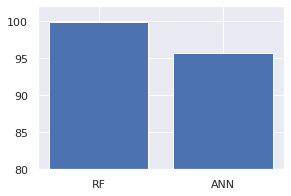

In [ ]:
names = ['RF' ,'ANN']
values = [99.816, 95.723]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

#### **TESTING ACCURACY of Models (After Feature Selection):**

<BarContainer object of 2 artists>

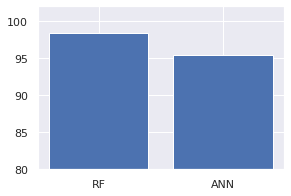

In [ ]:
names = ['RF', 'ANN']
values = [98.380, 95.363]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

### **Confusion Matrix of ANN Model (Before Feature Selection):**

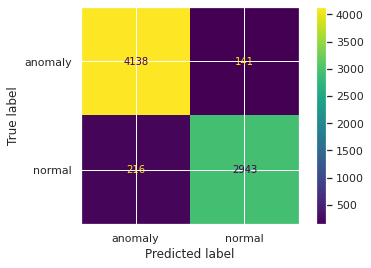

In [ ]:
# confusion_matrix:

labels = ['anomaly', 'normal']
cm = confusion_matrix(np.array(y_test), Y_test_pred_ANN)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()


### **Confusion Matrix of ANN Model (After Feature Selection):**

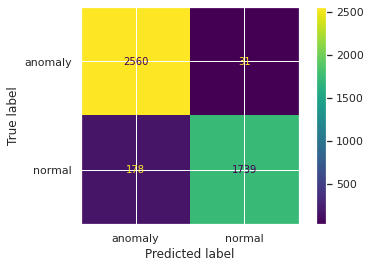

In [ ]:
# confusion_matrix:

labels = ['anomaly', 'normal']
cm = confusion_matrix(np.array(y_test_2), Y_test_pred_ANN_2)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()


# **Conclusion:**
* **We have used 2 models (Random Forest and ANN) and We build models using these 2 algorithms before and after selecting top important features.**
* **Analysis: We have selected Top 15 important features using Random Forest and these 15 features are giving maximam Accuracy. Random Forest is doing good job in Feature Selection here.**

* **ANN Model Accuracy with all Features:**
  * **Training Accuracy:** 95.370
  * **Testing Accuracy:** 95.200
  * **Loss:** 1.658

* **ANN Model Accuracy with only Top 15 Features:**
  * **Training Accuracy:** 95.723
  * **Testing Accuracy:** 95.363
  * **Loss:** 1.601
* **ANN (Artificial Neural Network) Model's Accuracy is approx 95% which is good Accuracy.**
